# Decision Tree Model for Drugs

In [9]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# Downloading the dataset

In [14]:
!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

--2022-06-20 18:20:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2022-06-20 18:20:08 (713 MB/s) - ‘drug200.csv’ saved [5827/5827]



In [17]:
my_data  = pd.read_csv('drug200.csv', delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# About the Dataset

In [18]:
my_data.shape

(200, 6)

In [20]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Pre-processing

In [21]:
# Split the data into feature and target variable
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [53]:
X = my_data.iloc[:, 0:5].values
# y  = my_data.iloc[:,5].values


As you may figure out, some features in this dataset are categorical, such as Sex or BP. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using pandas.get_dummies() to convert the categorical variable into dummy/indicator variables.

In [54]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

In [59]:
#Now we can fill the target variable
y=my_data['Drug']


# Setting Up The Decision Tree

In [64]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#Shape for the training data
print("Shape of X_train: ", x_trainset.shape)
print("Spe of y_train: ", y_trainset.shape)

#shape of the test data
print("Shape of X_test: ", X_testset.shape)
print("Spe of y_test: ", y_testset.shape)

Shape of X_train:  (140, 5)
Spe of y_train:  (140,)
Shape of X_test:  (60, 5)
Spe of y_test:  (60,)


# Modelling 

We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [65]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [66]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction
Now lets make some prediction on the testing data set and name it, **PredTree**

In [69]:
predTree = drugTree.predict(X_testset)
predTree

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [70]:
# Compare the result
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# Evaluation for the Decision Tree Algorithm

In [73]:
from sklearn import metrics
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy:  0.9833333333333333


# Visualization 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [76]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -

/bin/bash: conda: command not found
/bin/bash: conda: command not found


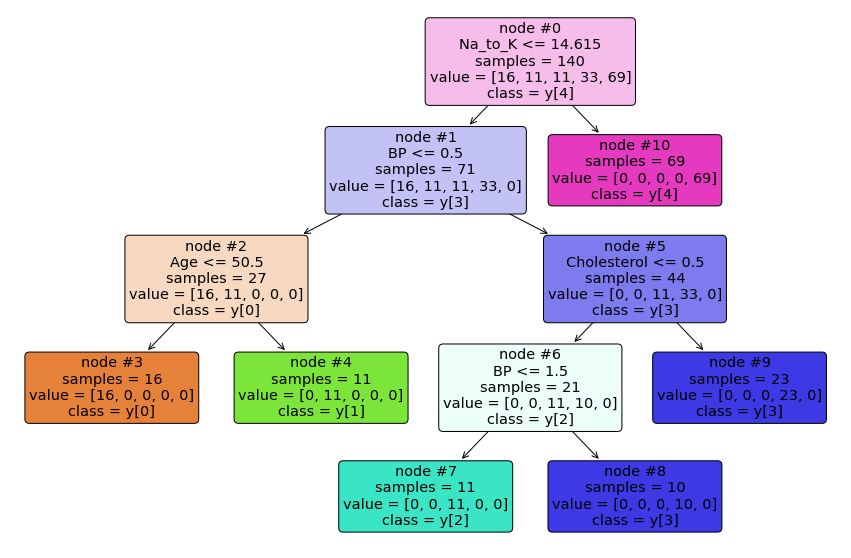

In [96]:
feature_tree = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
plt.figure(figsize=(15,10))
tree.plot_tree(drugTree, feature_names= feature_tree, class_names=True, filled=True, impurity=False, rounded=True, node_ids=True)
plt.show()